<a href="https://colab.research.google.com/github/SamhithaN/Hackathon---Nastech/blob/main/Hackathon_Samhitha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uploading of data
* conversion of file from '.data' to '.csv' has been done with the help of Microsoft excel
* upload dataset and save it in a dataframe


In [105]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [106]:
import pandas as pd

colnames=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
data = pd.read_csv('data/cleveland.csv',names=colnames,header=None)

#Pre-processing of dataset

Exploratory data analysis

In [107]:
print(data['num'].unique())
print(data.isnull().sum())
print(data['ca'].unique())
print(data['thal'].unique())

[0 2 1 3 4]
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
['0' '3' '2' '1' '?']
['6' '3' '7' '?']


Assigning appropriate values for each column

In [108]:
import numpy as np
data['ca'] = data.ca.map({'0': 0, '1': 1, '2': 2, '3': 3, '?': np.nan})
data['ca'] = data.ca.fillna(data.ca.mean())
data['thal'] = data.thal.map({'3': 3, '6': 6, '7': 7, '?': np.nan})
data['thal'] = data.thal.fillna(data.thal.mean())
print(data)

     age  sex  cp  trestbps  chol  ...  oldpeak  slope        ca  thal  num
0     63    1   1       145   233  ...      2.3      3  0.000000   6.0    0
1     67    1   4       160   286  ...      1.5      2  3.000000   3.0    2
2     67    1   4       120   229  ...      2.6      2  2.000000   7.0    1
3     37    1   3       130   250  ...      3.5      3  0.000000   3.0    0
4     41    0   2       130   204  ...      1.4      1  0.000000   3.0    0
..   ...  ...  ..       ...   ...  ...      ...    ...       ...   ...  ...
298   45    1   1       110   264  ...      1.2      2  0.000000   7.0    1
299   68    1   4       144   193  ...      3.4      2  2.000000   7.0    2
300   57    1   4       130   131  ...      1.2      2  1.000000   7.0    3
301   57    0   2       130   236  ...      0.0      2  1.000000   3.0    1
302   38    1   3       138   175  ...      0.0      1  0.672241   3.0    0

[303 rows x 14 columns]


## Mapping target values
* 0 as 'Negative' 
* 1 to 4 as 'Positive'

In [109]:
data['num'] = data.num.map({0:0,1:1,2:1,3:1,4:1})

# Train-test split:
* Data is split in the ratio of 80:20 for Train:Test respectively
* Selection of this data is done randomly


In [110]:
from sklearn.model_selection import train_test_split
def split_dataset():  
  X = data.drop('num',1).values
  y = data['num'].astype("int").values
  return train_test_split(X, y, test_size = 0.2, random_state = 0)

#Training the model
* Decision Tree classifier.
* This classifier has been chosen as it is well interpretable

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

def train_model():
  X_train, X_test, y_train, y_test = split_dataset()
  classifier = DecisionTreeClassifier()
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_pred, y_test)
  
  LogLoss = log_loss(y_pred, y_test, eps = 1e-15, normalize = True, sample_weight = None, labels = None)  
  cm = confusion_matrix(y_pred, y_test)
  
  return acc, LogLoss, cm

## Displaying interpretation in - 
* Image form
* Text form

Displaying image form of interpretation using matplotlib

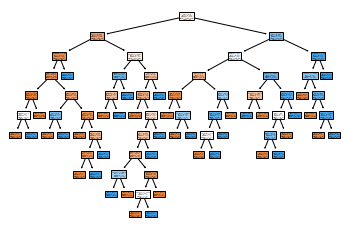

In [112]:
import matplotlib.pyplot as plt
from sklearn import tree

tree.plot_tree(classifier,
               feature_names = colnames[:-1], 
               class_names=['No','Yes'],
               filled = True);
fig.savefig('images/decisiontree.png', dpi=500, bbox_inches = "tight")

Displaying text form of tree interpretation

In [113]:
from sklearn.tree import export_text
text_tree = export_text(classifier, feature_names=colnames[:-1])
print(text_tree)

|--- cp <= 3.50
|   |--- thal <= 5.37
|   |   |--- oldpeak <= 3.55
|   |   |   |--- age <= 56.50
|   |   |   |   |--- chol <= 153.00
|   |   |   |   |   |--- oldpeak <= 0.70
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- oldpeak >  0.70
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- chol >  153.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- age >  56.50
|   |   |   |   |--- age <= 58.50
|   |   |   |   |   |--- ca <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- ca >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  58.50
|   |   |   |   |   |--- sex <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- sex >  0.50
|   |   |   |   |   |   |--- chol <= 259.00
|   |   |   |   |   |   |   |--- ca <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- ca >  1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- chol >  259.00
|   |   |   |

# Calculating average accuracy

In [114]:
current_acc, sum_acc = 0,0
for i in range(10):
  current_acc,ll,cm = train_model()
  sum_acc = sum_acc + current_acc

print("Average accuracy: ", sum_acc/10)

Average accuracy:  0.7754098360655737


# Printing Log loss

In [115]:
print("Log loss ", ll)

Log loss  8.493246601690194


# Printing confusion matrix

In [116]:
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[28  8]
 [ 7 18]]
